<a href="https://colab.research.google.com/github/Navbaloo/CAPSTONE-3-ML-Classification/blob/main/Mobile_price_Range_Prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Range Prediction**
    ML Classification Project

    Done By Navjot Balouria

       Individually

# **GitHub link**

https://github.com/Navbaloo/CAPSTONE-3-ML-Classification

# **Summary**

In the Competitive mobile phone market companies want to understand sales data of moblie phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone and its selling price. One common approach is to use regression analysis to model the relationship between the features and the selling price. This involves selecting a set of relevant features and fitting a regression model to the data to estimate the effect of each feature on the selling price.

   **Problem Statement**

    In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. 

    *Objective :  To find out relation between features of a mobile phone and it's selling price and to predict the actual price , a price range indicating how high the price is.



# **Getting Started !**

- Importing The Libraries 

In [ ]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('darkgrid')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- Loading Data Frame

In [ ]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing csv file 
data = ('/content/drive/MyDrive/data_mobile_price_range.csv')
data_frame = pd.read_csv(data)

In [ ]:
# first look of the dataframe
data_frame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# number of rows and columns
data_frame.shape


(2000, 21)

In [ ]:
# first 5 rows of the dataset
data_frame.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Last 5 rows of the dataset
data_frame.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


- **Information of the dataset**

In [ ]:
# using .info method 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- **Duplicate Values**

In [ ]:
# checking for Duplicate values
data_frame.duplicated().sum()

0

    No Duplicated values present in the dataset

# **Missing / Null values**

In [ ]:
# checking for null or missing values
data_frame.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

            The dataset doesn't contain null or missing values

# **Understanding The Variables**

In [ ]:
# Columns in the dataset
tuple(data_frame.columns)

('battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range')

In [ ]:
# numerical description of the dataset
data_frame.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


    **Discription of the Variables**

**1. Battery_power:** The capacity of the battery in mAh.

**2.Blue:**  Does the device has bluetooth or not.

**3.Clock_speed:** The speed at which microprocessor executes instructions.

**4.Dual_sim:** Does the device has dual sim support or not.

**5. Fc:** Front camera megapixels.

**6. Four_g:** Has 4G or not.

**7.int_memory:** The device's internal memory capacity 

**8.M_dep:** Mobile depth in cm.

**9.MObile_wt:** Weight of the mobile phone.

**10.N_cores:** Number of cores in processor.

**11.Pc:** Primary camera megapixels.

**12.Px_height:** pixel resolution height.

**13.Px_width:** pixel resolution width.

**14.Ram:** Random Access Memory in MB.

**15.Sc_h:** Screen height.

**16.Sc_w:** Screen width.

**17.Talk_time:** Longest that a single battery can last over a call.

**18.Three_g:** Has 3G or not.


**19.Wifi:** Has Wifi or not.

**20.Price_range:**This is the target variable with a value of 0(low cost), 1(medium cost), 2(high cost), 3(very high cost).

    Mobile Price Range

In [ ]:
price=data_frame['price_range'].value_counts()
price

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

# **Data Visualisation**

Text(0.5, 1.0, 'Price Range')

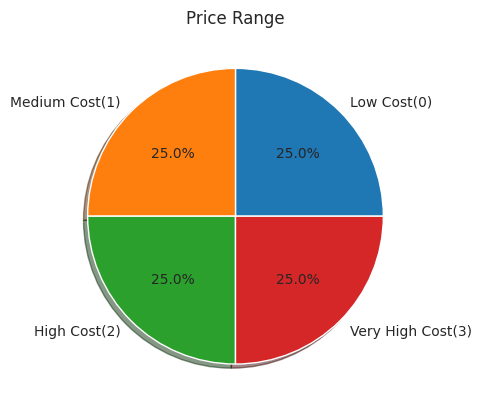

In [ ]:
# price range pie chat
plt.pie(price,autopct="%1.1f%%",labels=["Low Cost(0)", "Medium Cost(1)","High Cost(2)", "Very High Cost(3)"] , shadow=True)
plt.title('Price Range')

    - There are 500 mobiles which are of low cost, 500 mobiles are of medium cost, 500 mobiles are high cost and 500 mobiles are of very high cost.
    - In total of 2000 mobile phones.
    - The Price range is equally distributed .

<Axes: xlabel='price_range', ylabel='battery_power'>

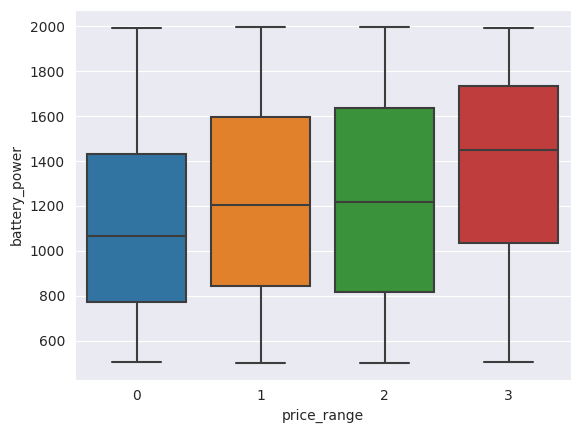

In [ ]:
# price range vs battery power boxplot
sns.boxplot(x="price_range", y="battery_power", data=data_frame)

- Price range is increasing from low to medium then to high to very high so as the  battery power.

Text(0.5, 1.0, 'Distribution by price range')

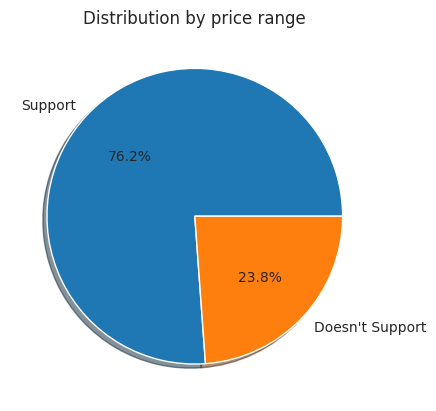

In [ ]:
# 3g price range pie chat
three_G=data_frame['three_g'].value_counts()
plt.pie(three_G,autopct="%1.1f%%", shadow=True, labels=["Support", "Doesn't Support"])
plt.title('Distribution by price range')

    Three G support percentage is 76.2% and does not support percentage is 23.8%.

Text(0.5, 1.0, 'Distribution by price range')

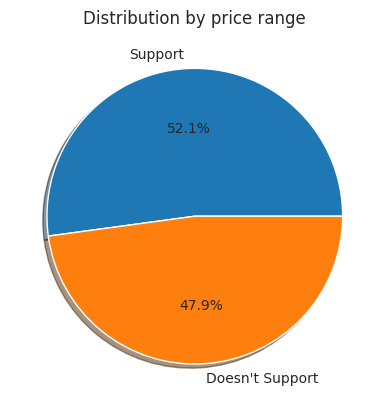

In [ ]:
# 4g price range pie chat
four_G=data_frame['four_g'].value_counts()
plt.pie(four_G,autopct="%1.1f%%", shadow=True, labels=["Support", "Doesn't Support"])
plt.title('Distribution by price range')

    Four G support percentage is 52.1% and does not support percentage is 47.9%.

In [ ]:
# storing independent values 
independent_vari= data_frame[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]
independent_vari

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:
# storing dependent values
dependent_vari=data_frame[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]
dependent_vari

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


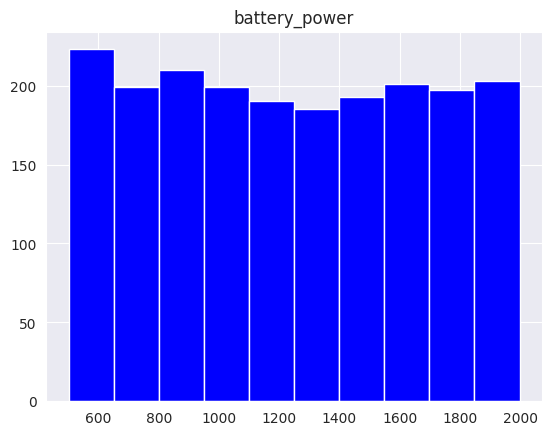

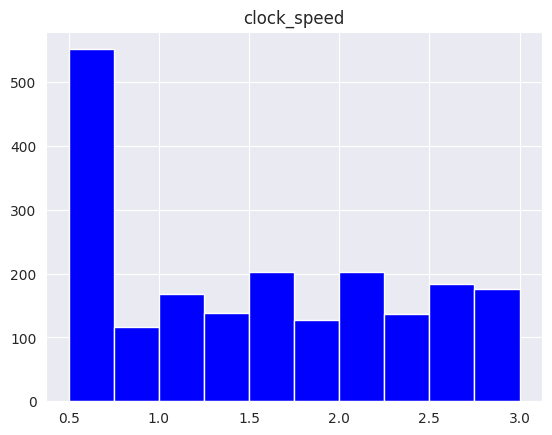

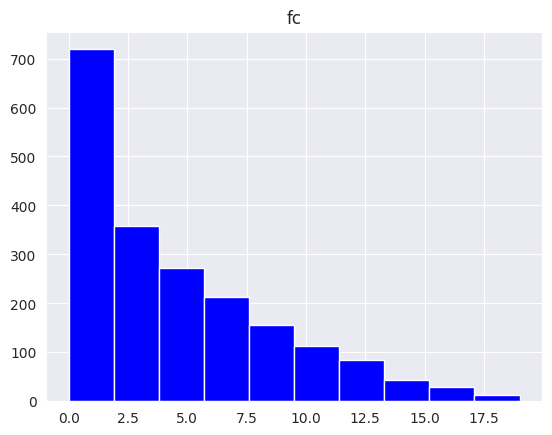

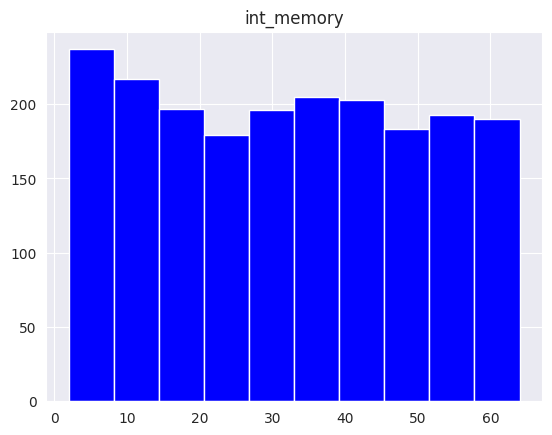

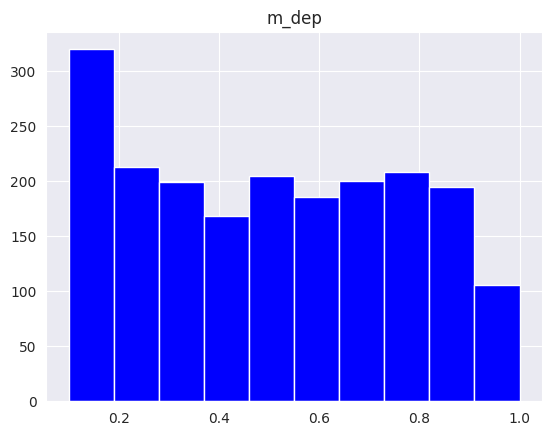

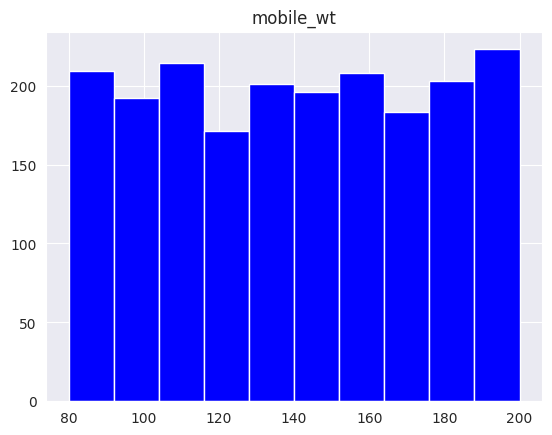

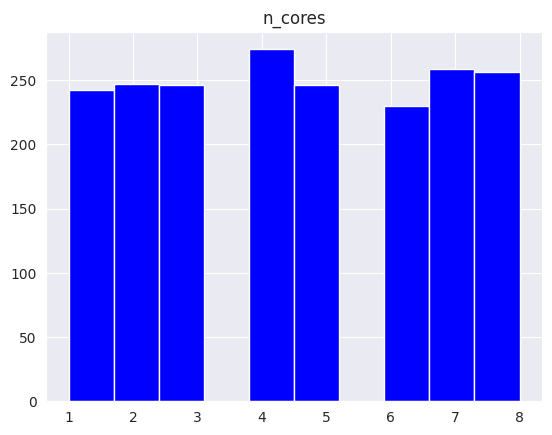

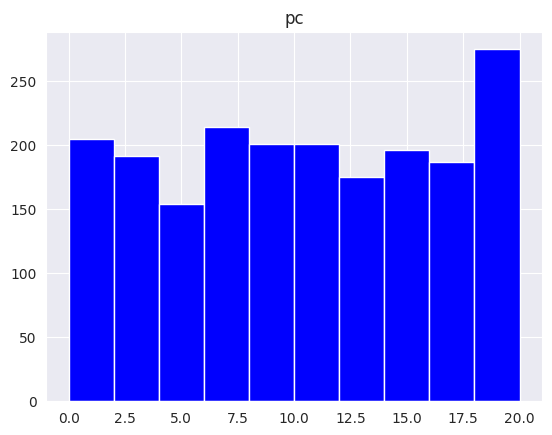

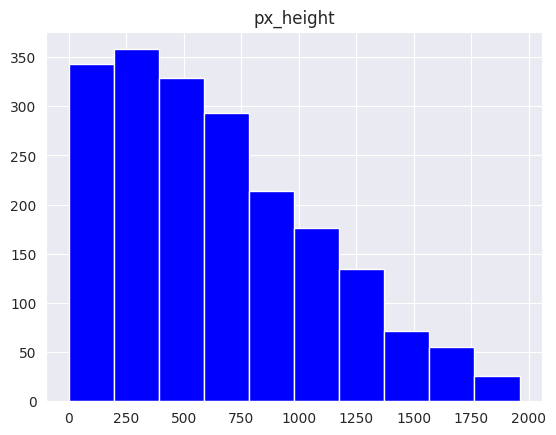

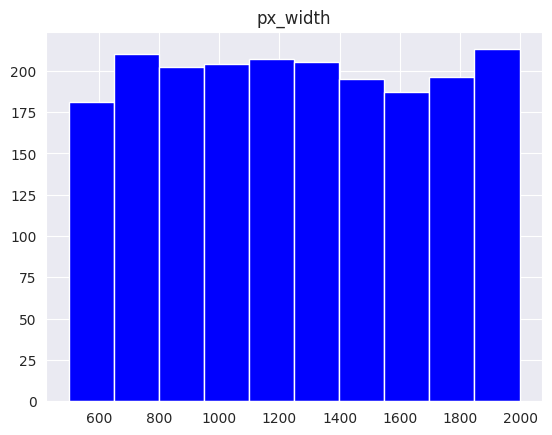

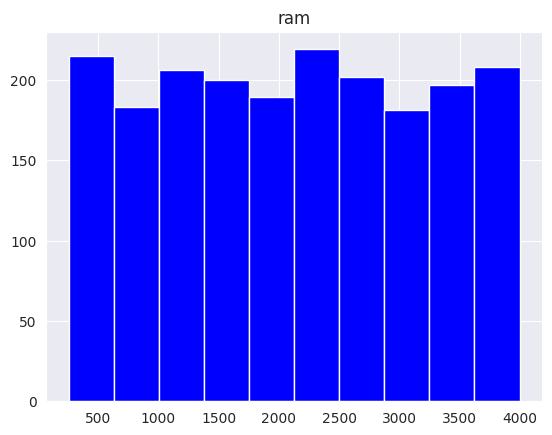

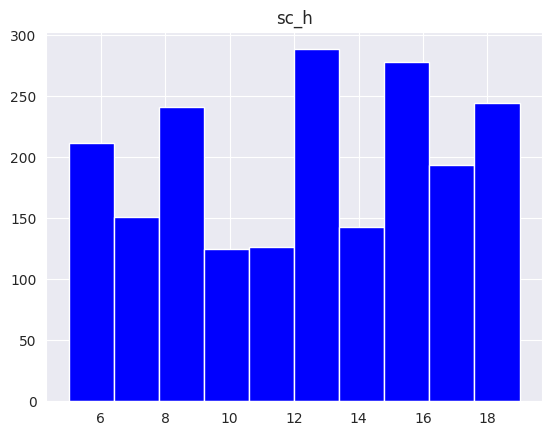

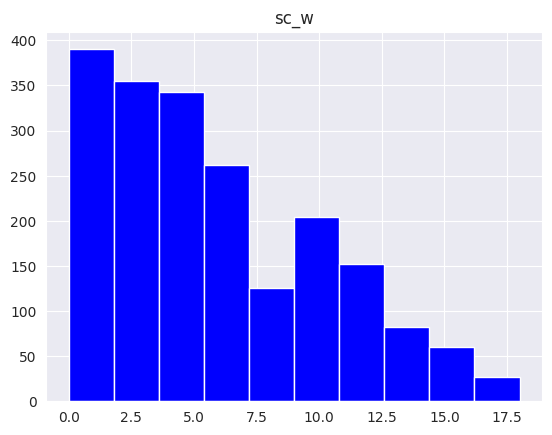

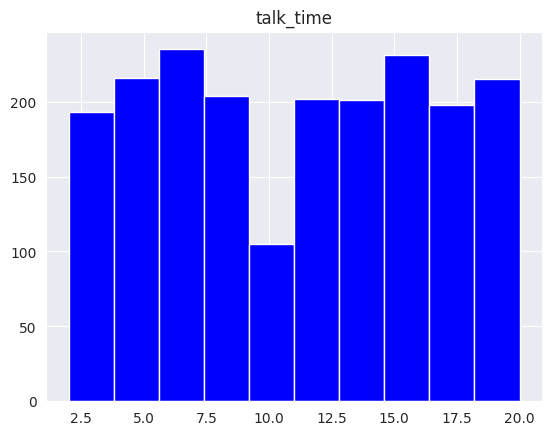

In [ ]:
# plotting histogram for independent variables
for i in independent_vari.columns:
  plt.hist(data_frame[i],color='blue')
  plt.title(i)
  plt.show()

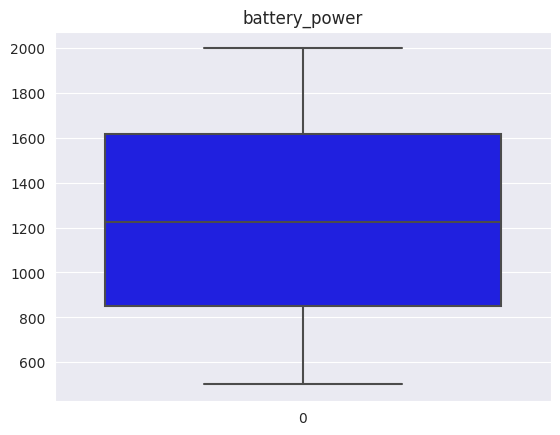

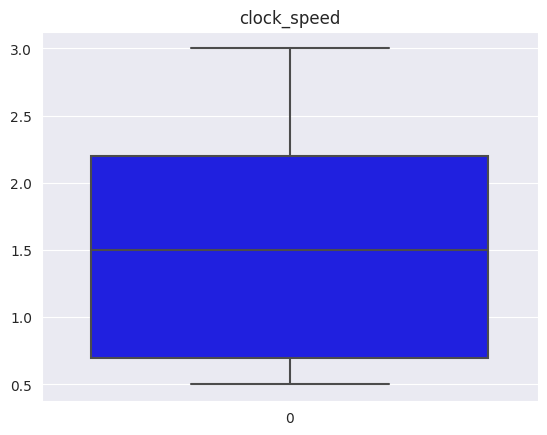

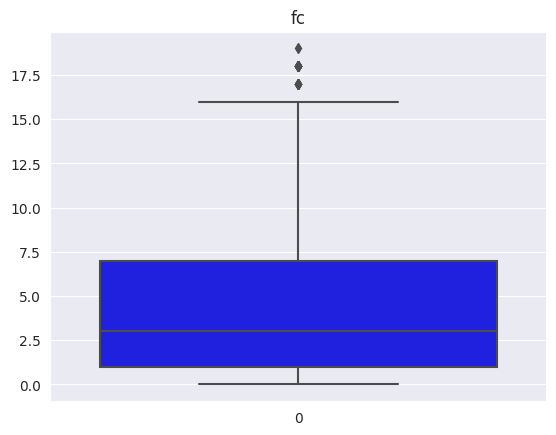

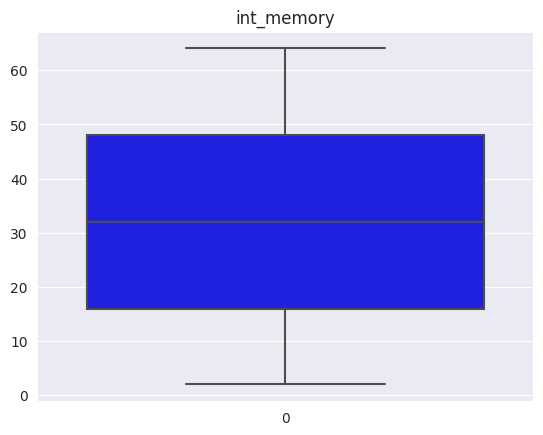

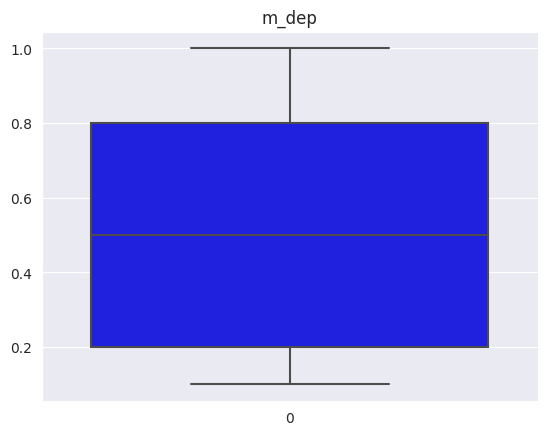

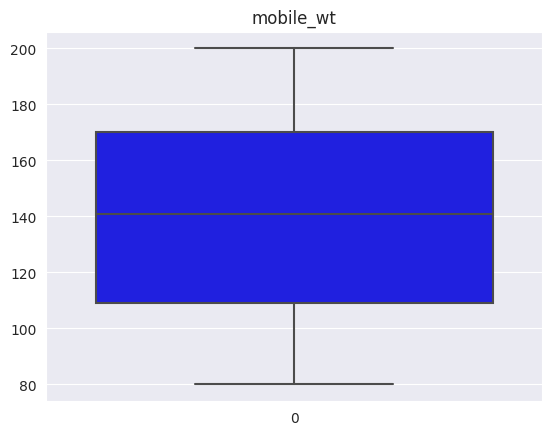

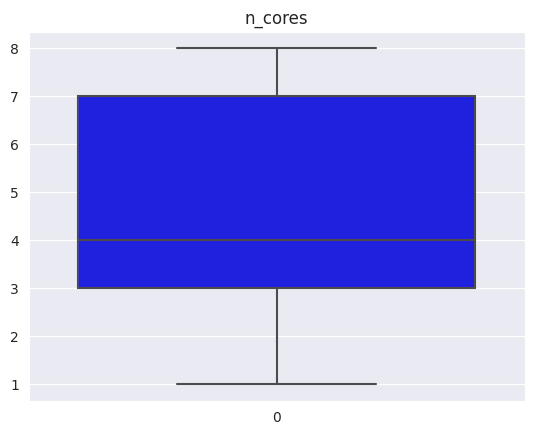

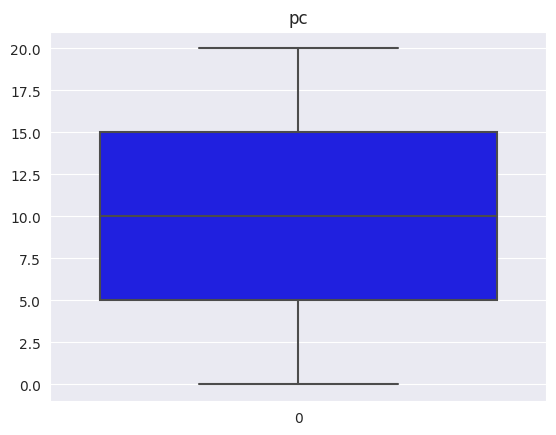

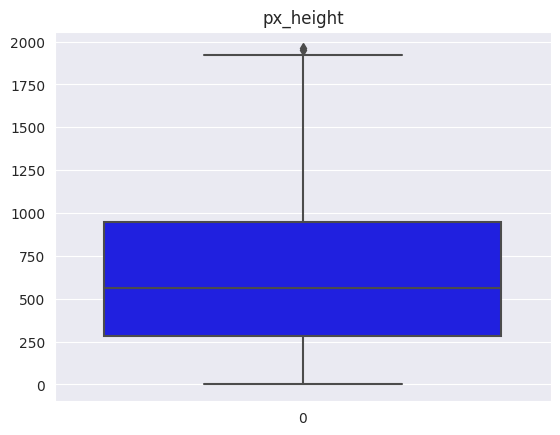

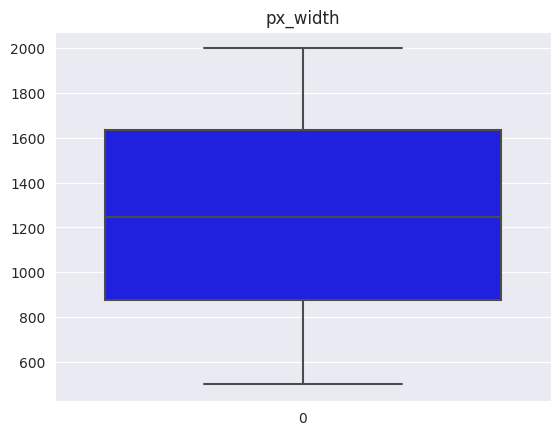

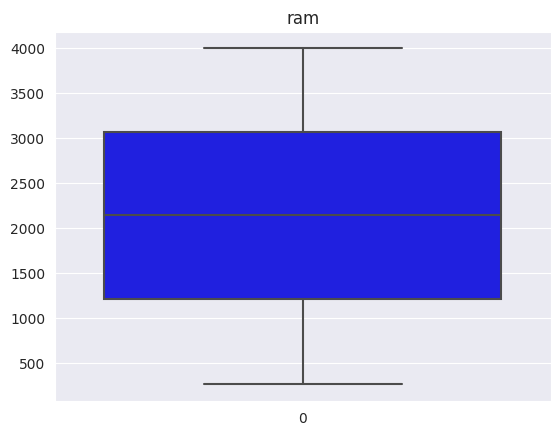

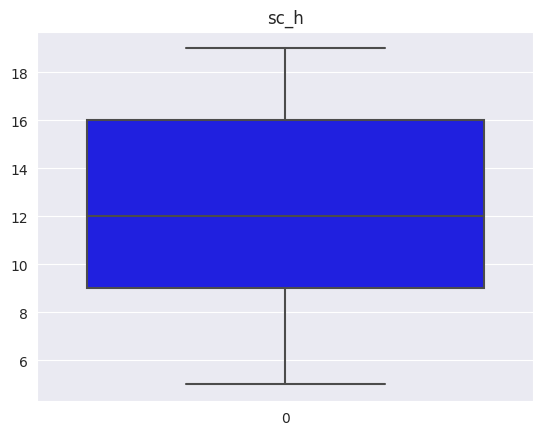

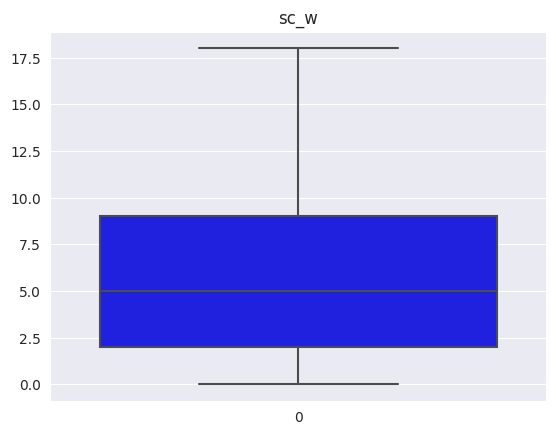

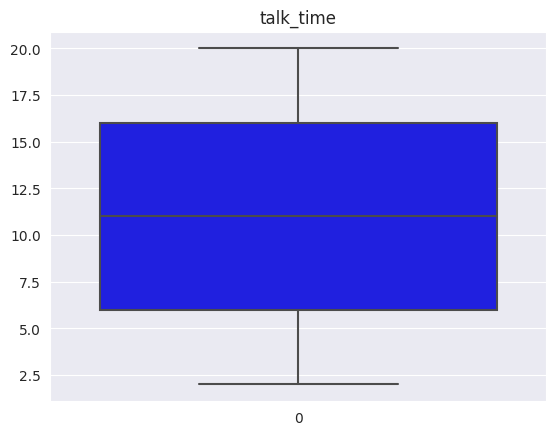

In [ ]:
# plotting boxplots for dealing with outliers
for i in independent_vari.columns:
  sns.boxplot(independent_vari[i], color='blue')
  plt.title(i)
  plt.show()


    - Boxplot does not explain the business impact.

    - It's done just to see the distribution of the column data over the dataset.

    - All columns are symmetrically distributed and mean is nearly same with median for independent columns.
    

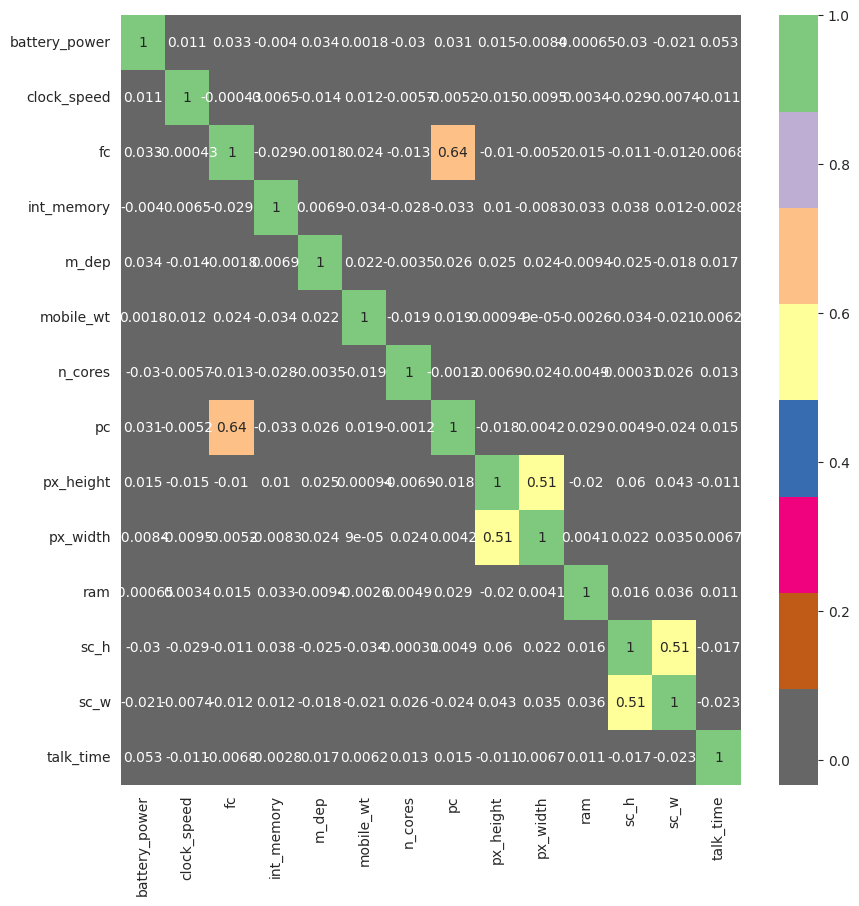

In [ ]:
# correlation heatmap of independent variables
plt.figure(figsize=(10,10))
sns.heatmap(independent_vari.corr(), annot=True, cmap=plt.cm.Accent_r)
plt.show()

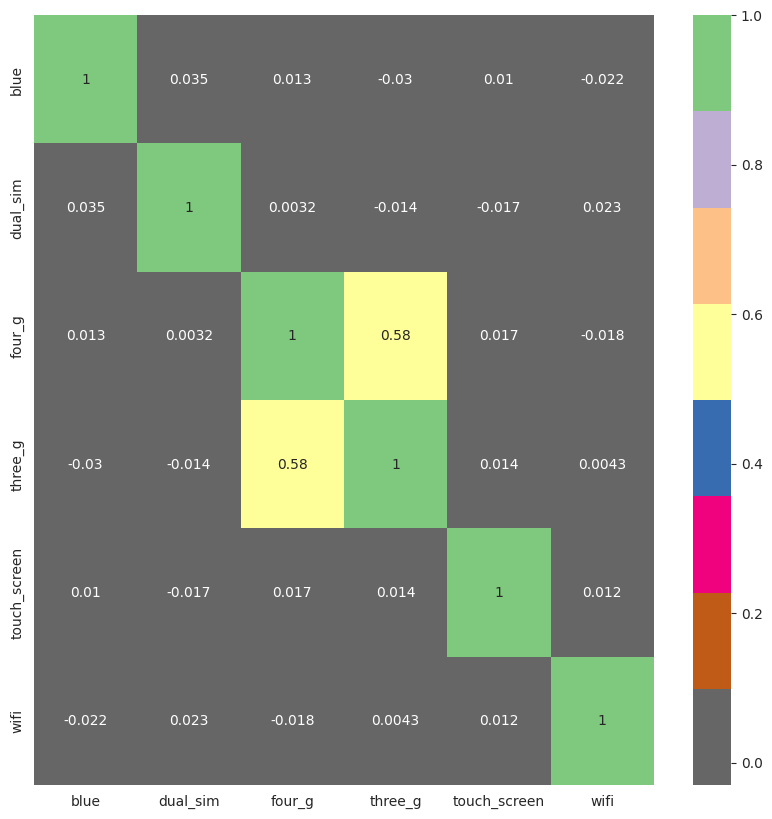

In [ ]:
# correlation heatmap of dependent variables
plt.figure(figsize=(10,10))
sns.heatmap(dependent_vari.corr(), annot=True, cmap=plt.cm.Accent_r)
plt.show()

      - The total price range is positively highly correlated.
      - The total ram is correlated.
      - Total pc and fc are correlated.   

     * Solution to problem statment
     - Price based on value.
     - Price with the trend.
     - Knowing when to raise or lower the prices.
     - Use high-low strategies to attract customers.

# **ML Implementation**

In [ ]:
# crossed wifi and price range
ct= pd.crosstab(data_frame['wifi'], data_frame['price_range'])
from scipy.stats import chi2_contingency
stat, pvalue, dof, expected_R= chi2_contingency(ct)
print("pvalue: ", pvalue)

if pvalue<= 0.1:
  print("Alternate Hypothesis passed. int_memory and price_range have relationship")
else:
  print("Null hypothesis passed. int_memory and price_range does not have relationship")

pvalue:  0.8359905195342198
Null hypothesis passed. int_memory and price_range does not have relationship


    Chi-test helps to figure out relation between feature and label with pvalue<=0.1

In [ ]:
# assigning new variable for pixels
data_frame['pixels']= data_frame['px_height']*independent_vari['px_width']

# dropping px_height and px_width
data_frame.drop(['px_height', 'px_width'], axis=1, inplace=True)

In [ ]:
# defining x and y 
x= data_frame.drop(['price_range'], axis=1).values
y= data_frame['price_range'].values

In [ ]:
# transforming x
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x= scaler.fit_transform(x)

In [ ]:
# splittng training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=167)
print(x_train.shape)
print(x_test.shape)

(1600, 19)
(400, 19)


- **Logistic Regression**

In [ ]:
# applying logistic regression
log_model= LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# model coefficients
log_model.coef_

array([[-3.38407256e+00,  5.41902571e-02,  1.55047251e-01,
         7.08420015e-02, -1.94995610e-01, -4.37504133e-02,
        -1.84458790e-01, -1.58044681e-01,  3.69325096e-01,
         4.47249333e-02, -7.01155459e-02, -1.38294850e+01,
         8.69669726e-02, -8.09664610e-02, -2.43242075e-01,
        -1.50679740e-01,  6.59288656e-02,  1.03614130e-01,
        -4.17740439e+00],
       [-8.23026191e-01, -8.55531861e-03, -2.64950184e-02,
        -2.89719644e-03,  9.13788137e-02,  9.16386268e-02,
         2.29674836e-03,  1.97218978e-01,  1.54960154e-01,
        -2.95335033e-01, -1.74893257e-03, -3.96373780e+00,
        -8.65198371e-02, -1.26303746e-01,  8.62048731e-02,
        -6.47659101e-02,  2.64094664e-02,  5.61686210e-02,
        -6.80558888e-01],
       [ 8.09641610e-01, -6.14479915e-03, -9.20038991e-02,
        -8.78545771e-02,  1.60520436e-01, -1.66909126e-01,
        -2.14565453e-01, -1.10445706e-01,  1.95030676e-01,
         1.66835043e-01, -7.89695487e-02,  4.16131692e+00,
    

In [ ]:
# model intercept value
log_model.intercept_

array([  8.33316134,   3.71151815,  -1.32800618, -10.7166733 ])

In [ ]:
# prediction
train_score= log_model.score(x_train, y_train)
testscore= log_model.score(x_test, y_test)
print("train score:{}".format(train_score), '\n')
print("test score:{}".format(testscore), '\n')
y_predlogi= log_model.predict(x_test)
print('f1 score: ',f1_score(y_test, y_predlogi,average='micro'),'\n')

# confusion matrix for both train and test
print(confusion_matrix(y_test, y_predlogi))

train score:0.916875 

test score:0.905 

f1 score:  0.905 

[[105   8   0   0]
 [  5  72   6   0]
 [  0   6  79   6]
 [  0   0   7 106]]


In [ ]:
# values for precision, recall and classifiaction of y_test
print('precision score: ',precision_score(y_test, y_predlogi, average='micro'), '\n')
print('recall score: ',recall_score(y_test, y_predlogi, average='micro'), '\n')
print(classification_report(y_test, y_predlogi))

precision score:  0.905 

recall score:  0.905 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       113
           1       0.84      0.87      0.85        83
           2       0.86      0.87      0.86        91
           3       0.95      0.94      0.94       113

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



In [ ]:
# probability value
probabilityvalues= log_model.predict_proba(x)
auc= roc_auc_score(y, probabilityvalues,multi_class='ovr')
print(auc)

0.9881683333333333


- **Cross Validation and Hyperparameter Tuning**

In [ ]:
# hyperparameter optimization 
param={'C': [0.01,0.1,1,10,100,110,120,130]}
grid=GridSearchCV(LogisticRegression(max_iter=500),param,n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 110, 120, 130]})

In [ ]:
# prediction on the model
trainscore= grid.score(x_train, y_train)
testscore= grid.score(x_test, y_test)
print("train score: {}".format(trainscore), '\n')
print("test score: {}".format(testscore), '\n')
y_predlopgi= grid.predict(x_test)
print ('f1 score: ', f1_score(y_test, y_predlogi, average='micro'),'\n')
print(confusion_matrix(y_test, y_predlogi))

train score: 0.949375 

test score: 0.9425 

f1 score:  0.905 

[[105   8   0   0]
 [  5  72   6   0]
 [  0   6  79   6]
 [  0   0   7 106]]


- Train score is  0.949375 

- Test score is 0.9425 

- F1 score is 0.905

**K- Nearest Neighbours (knn)**

In [ ]:
# import Kneighboursclassifiers
from sklearn.neighbors import KNeighborsClassifier
# setup arrays to store training and test accuracies
neighbors= np.arange(1,100)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors)) 

for i,k in enumerate(neighbors):
  # setup a KNN classifier with k neighbours
  knn= KNeighborsClassifier(n_neighbors=k)

  # fit the model
  knn.fit(x_train, y_train)

  # compute accuracy on the training set
  train_accuracy[i]= knn.score(x_train, y_train)
  # compute accuracy on the test set
  test_accuracy[i]= knn.score(x_test, y_test)

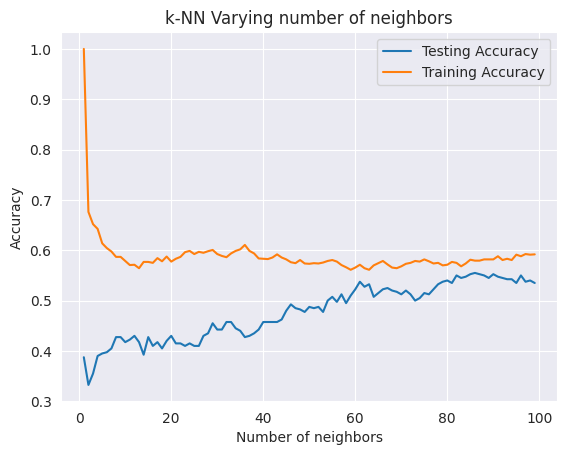

In [ ]:
# generating plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# setup a knn classifier with k neighbors
knn=KNeighborsClassifier(n_neighbors=90)
# fit the model
knn.fit(x_train, y_train)
KNeighborsClassifier(n_neighbors=90)


KNeighborsClassifier(n_neighbors=90)

In [ ]:
# prediction of the model
train_score= knn.score(x_train, y_train)
test_score= knn.score(x_test, y_test)

print("train score: {}".format(train_score),'\n')
print("test score: {}".format(test_score),'\n')
y_predlogi= knn.predict(x_test)
print('f1 score: ', f1_score(y_test, y_predlogi, average='micro'),'\n')
print(confusion_matrix(y_test,y_predlogi))

train score: 0.581875 

test score: 0.5525 

f1 score:  0.5525 

[[71 38  4  0]
 [20 45 17  1]
 [ 3 27 51 10]
 [ 1  6 52 54]]


- Train score is 0.581875 

- Test score is 0.5525 

- F1 score is 0.5525 


In [ ]:
# probability of knn
probability_Values= knn.predict_proba(x)
auc= roc_auc_score(y, probability_Values, multi_class='ovr')
print(auc)

0.809415


- **Naive Bayes Classifier**

In [ ]:
# implementing naive bayes classifier
nb_model= GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [ ]:
train_s= nb_model.score(x_train, y_train)
test_s= nb_model.score(x_test, y_test)

print("train score: {}".format(train_s),'\n')
print("test score: {}".format(test_s),'\n')
y_predNB= nb_model.predict(x_test)
print('f1 score: ', f1_score(y_test, y_predNB,average='micro'),'\n')
print(confusion_matrix(y_test,y_predNB))

train score: 0.8125 

test score: 0.8125 

f1 score:  0.8125 

[[100  13   0   0]
 [  3  61  19   0]
 [  0  16  60  15]
 [  0   0   9 104]]


In [ ]:
# score
print('precision score: ', precision_score(y_test,y_predNB, average='micro'),'\n')
print('recall score: ', recall_score(y_test,y_predNB, average='micro'),'\n')
print(classification_report(y_test, y_predNB))

precision score:  0.8125 

recall score:  0.8125 

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       113
           1       0.68      0.73      0.71        83
           2       0.68      0.66      0.67        91
           3       0.87      0.92      0.90       113

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.82      0.81      0.81       400



In [ ]:
# probability of Naive Bayes Classifier
probabilityValues= nb_model.predict_proba(x)
auc= roc_auc_score(y, probabilityValues, multi_class='ovr')
print(auc)

0.951789


-  Among the three implemented model i have chosen the Linear Regression model Which is hyperparameter optimized. First of all, i need accuracy for mobile price range prediction. From the three implemented model the accuracy of Linear Regression model is very high so i have chosen this model for final prediction.

# **Conclusion**

- From EDA we have seen that there are mobile phones in 4 price ranges.
- The number of elements are similar.
- Half the devices have bluetooth and half of the devices doen't.
- There is a gradual increase in battery power as the price range is increasing.
- RAM has continuous increase with price range while moving from low to very 
  high cost.
- From all the experiments on the model got the conclusion that the Linear Regression model is very much accurate and it is preferrable for mobile price 
  range prediction.